In [1]:
import sys
sys.path.append(r'/home/santiago/Documents/dev/reservoirpy')

In [2]:
from reservoirpy.simulationpy import grid as gd
import numpy as np
import pyvista as pv
import vtk 
from shapely.geometry import Point
import math
import matplotlib.pyplot as plt

In [15]:
ct=gd.grid( 
    grid_type='cartesian',
    nx = 3,
    ny = 3,
    nz = 3,
    dx = 100,
    dy = 100,
    dz=  50,
    origin = Point(100,100,-5000),
    petrophysics = {'PORO':np.arange(27),'PERMX':200, 'PERMY':300},
    azimuth=0,
    dip=0
)

In [16]:
ct.petrophysics

{'PORO': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 'PERMX': array([200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
        200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
        200]),
 'PERMY': array([300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
        300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,
        300])}

In [17]:
p=ct.cartesian_vertices_coord
c=ct.cartesian_center_point_coord
c

array([[  150.,   150., -5025.],
       [  250.,   150., -5025.],
       [  350.,   150., -5025.],
       [  150.,   250., -5025.],
       [  250.,   250., -5025.],
       [  350.,   250., -5025.],
       [  150.,   350., -5025.],
       [  250.,   350., -5025.],
       [  350.,   350., -5025.],
       [  150.,   150., -5075.],
       [  250.,   150., -5075.],
       [  350.,   150., -5075.],
       [  150.,   250., -5075.],
       [  250.,   250., -5075.],
       [  350.,   250., -5075.],
       [  150.,   350., -5075.],
       [  250.,   350., -5075.],
       [  350.,   350., -5075.],
       [  150.,   150., -5125.],
       [  250.,   150., -5125.],
       [  350.,   150., -5125.],
       [  150.,   250., -5125.],
       [  250.,   250., -5125.],
       [  350.,   250., -5125.],
       [  150.,   350., -5125.],
       [  250.,   350., -5125.],
       [  350.,   350., -5125.]])

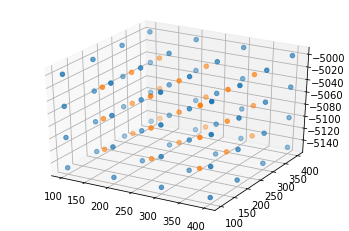

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(p[:,0],p[:,1],p[:,2])
ax.scatter(c[:,0],c[:,1],c[:,2])

In [19]:
ct.get_vertices_z(2,0,2)

array([-5100., -5100., -5100., -5100., -5150., -5150., -5150., -5150.])

In [20]:
ct.get_vertices_coords(0,0,0)

array([[  100.,   100., -5000.],
       [  200.,   100., -5000.],
       [  100.,   200., -5000.],
       [  200.,   200., -5000.],
       [  100.,   100., -5050.],
       [  200.,   100., -5050.],
       [  100.,   200., -5050.],
       [  200.,   200., -5050.]])

In [21]:
ct.get_vertices_face_z(0,0,2,face='Z+')

array([-5100., -5100., -5100., -5100.])

In [22]:
ct.get_center_coord(0,0,2)

array([  150.,   150., -5125.])

In [23]:
ct_grid=ct.get_vtk()
#ct_grid.plot(show_edges=True)

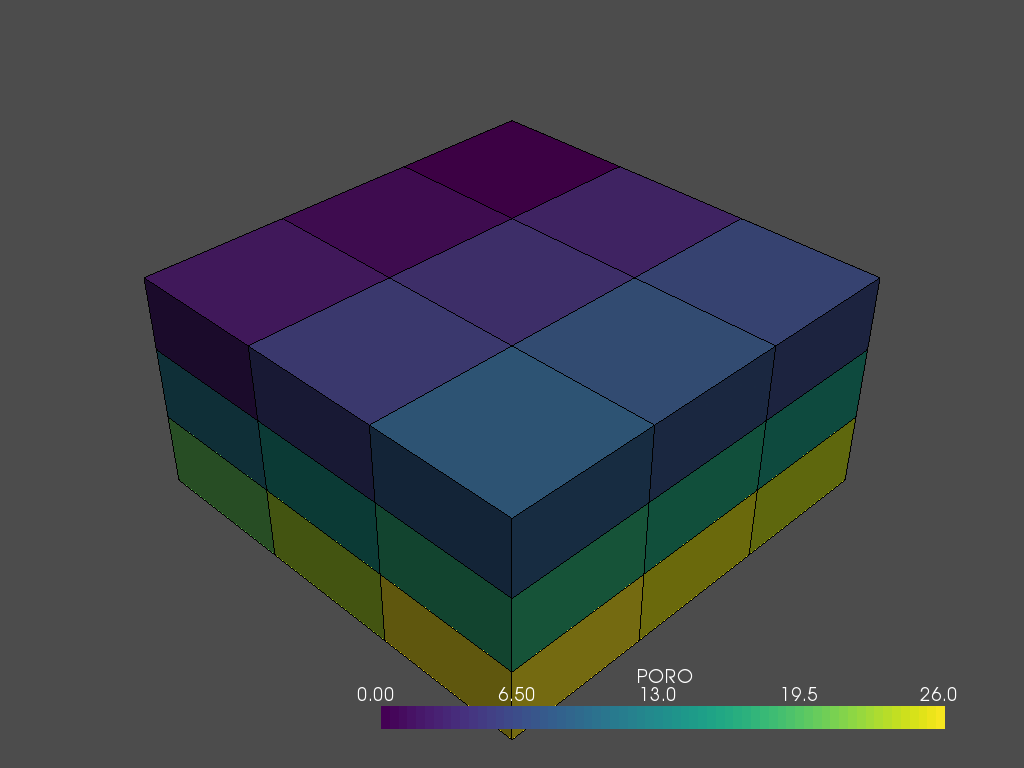

ERROR:root:The interactor must be set prior to enabling/disabling widget


In [26]:
ct_grid.plot(scalars='PORO',show_edges=True)

In [25]:
cord = np.array([
    0,0,0,0,0,10,
    3,0,0,3,0,10,
    6,0,0,6,0,10,
    9,0,0,9,0,10,
    0,3,0,0,3,10,
    3,3,0,3,3,10,
    6,3,0,6,3,10,
    9,3,0,9,3,10,
    0,6,0,0,6,10,
    3,6,0,3,6,10,
    6,6,0,6,6,10,
    9,6,0,9,6,10,
    0,9,0,0,9,10,
    3,9,0,3,9,10,
    6,9,0,6,9,10,
    9,9,0,9,9,10
])


In [14]:
zcorn = np.array([
    [0]*36 + 
    [3]*72 +
    [6]*72 +
    [9]*36
]).flatten(order='F')

In [15]:
cp =gd.grid(
    grid_type='corner_point',
    nx = 3,
    ny = 3,
    nz = 3,
    coord = cord,
    zcorn = zcorn,
    petrophysics = {'PORO':[0.12]*27,'PERMX':200, 'PERMY':300}
)

In [16]:
cp.get_cell_id(2,2,2)

26

In [17]:
cp.get_cell_ijk(10)

(1, 0, 1)

In [18]:
cp.get_pillar(4)

array([[ 0,  3,  0],
       [ 0,  3, 10]])

In [19]:
cp.get_cell_pillars(1,1)

array([[[ 3,  3,  0],
        [ 3,  3, 10]],

       [[ 6,  3,  0],
        [ 6,  3, 10]],

       [[ 3,  6,  0],
        [ 3,  6, 10]],

       [[ 6,  6,  0],
        [ 6,  6, 10]]])

In [20]:
cp.get_vertices_id(0,0,0,order='VTK')

array([36, 37, 43, 42,  0,  1,  7,  6])

In [21]:
cp.get_vertices_z(2,1,2)


array([6, 6, 6, 6, 9, 9, 9, 9])

In [22]:
cp.get_vertices_coords(0,0,0,order='VTK')

array([[0., 0., 3.],
       [3., 0., 3.],
       [3., 3., 3.],
       [0., 3., 3.],
       [0., 0., 0.],
       [3., 0., 0.],
       [3., 3., 0.],
       [0., 3., 0.]])

In [23]:
cp.get_vertices_face_z(0,0,2,face='Z+')

array([6, 6, 6, 6])

In [24]:
cp.get_center_coord(2,2,2)

array([7.5, 7.5, 7.5])

In [25]:
cp.get_vertices_face_coords(0,0,0,face='Y+')

array([[0., 3., 0.],
       [3., 3., 0.],
       [0., 3., 3.],
       [3., 3., 3.]])

In [26]:
grid = cp.get_vtk()
grid

UnstructuredGrid,Information
N Cells,27
N Points,216
X Bounds,"0.000e+00, 9.000e+00"
Y Bounds,"0.000e+00, 9.000e+00"
Z Bounds,"0.000e+00, 9.000e+00"
N Arrays,0


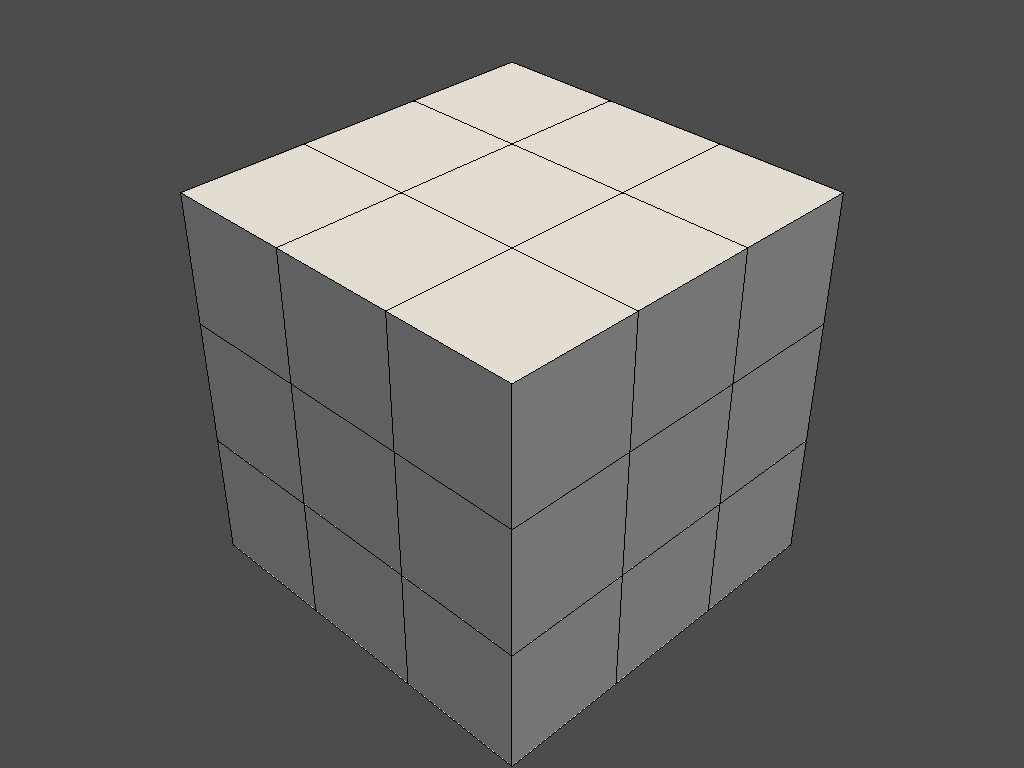

ERROR:root:The interactor must be set prior to enabling/disabling widget


In [27]:
grid.plot(show_edges=True)

In [28]:
coord=np.loadtxt('coord.txt').flatten()
zcorn = np.loadtxt('zcord.txt').flatten()

In [29]:
ts =gd.grid(
    grid_type='corner_point',
    nx = 20,
    ny = 20,
    nz = 5,
    coord = coord,
    zcorn = zcorn,
)

In [30]:
gr = ts.get_vtk()

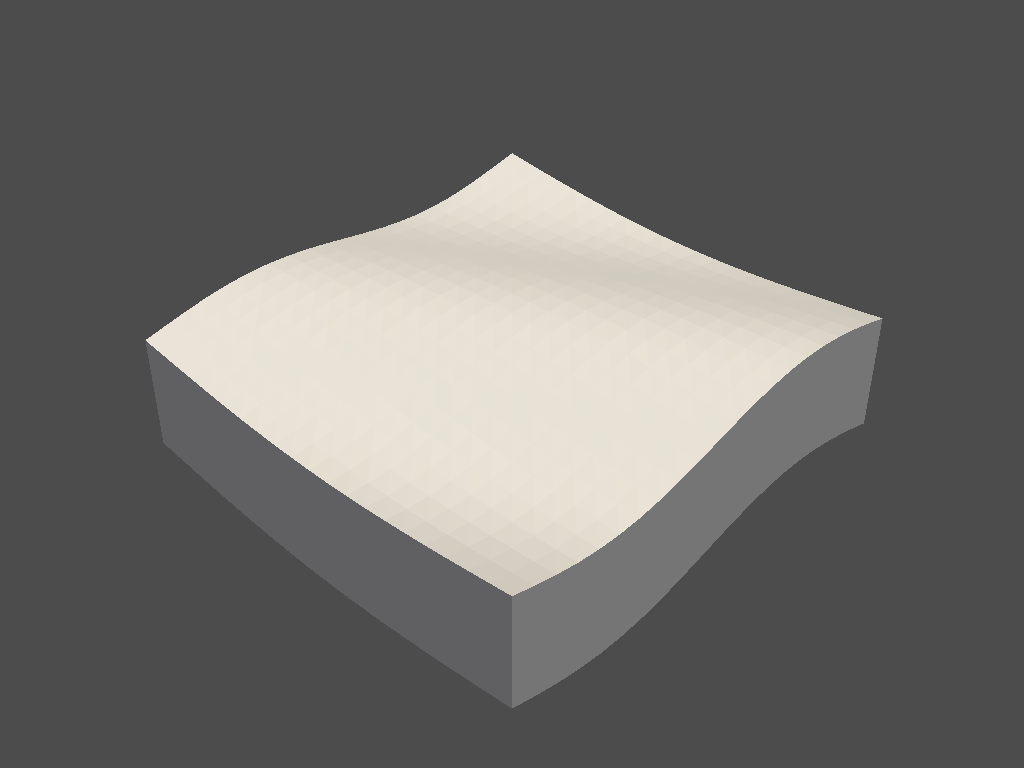

ERROR:root:The interactor must be set prior to enabling/disabling widget


In [33]:
gr.plot(show_edges=True)